In [1]:
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/6%20Optimizaci%C3%B3n%20por%20enjambre%20de%20part%C3%ADculas/C%C3%B3digos/Plot_Contour.py'
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/6%20Optimizaci%C3%B3n%20por%20enjambre%20de%20part%C3%ADculas/C%C3%B3digos/Plot_Surf.py'

import matplotlib.pyplot as plt
import numpy as np
from Plot_Surf import *
from Plot_Contour import *
from IPython import display

--2023-10-06 03:39:41--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/6%20Optimizaci%C3%B3n%20por%20enjambre%20de%20part%C3%ADculas/C%C3%B3digos/Plot_Contour.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 649 [text/plain]
Saving to: ‘Plot_Contour.py’

Plot_Contour.py     100%[===================>]     649  --.-KB/s    in 0s      

2023-10-06 03:39:41 (25.4 MB/s) - ‘Plot_Contour.py’ saved [649/649]

--2023-10-06 03:39:41--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/6%20Optimizaci%C3%B3n%20por%20enjambre%20de%20part%C3%ADculas/C%C3%B3digos/Plot_Surf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent

Función objetivo

In [13]:
#f = lambda x, y: (x-2)**2 + (y-2)**2
#f = lambda x, y: -20 * np.exp(-0.2 * np.sqrt(0.5*(x**2 + y**2))) - np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y))) + 20 + np.exp(1)
#f = lambda x, y: -((1+np.cos(12*np.sqrt(x**2+y**2))) / (0.5*(x**2+y**2)+2))
#f = lambda x, y: 10*2 + x**2 + y**2 - 10*np.cos(2*np.pi*x) - 10*np.cos(2*np.pi*y)
#f = lambda x, y: ((x**2/4000)+(y**2/4000))-(np.cos(x)*np.cos(y/np.sqrt(2)))+1
f = lambda x, y: (x**2)+(y**2)

Parámetros

In [14]:
xl = np.array([-5.12, -5.12])
xu = np.array([5.12, 5.12])

G = 20
N = 50
D = 2

w = 0.6
c1 = 2
c2 = 2

# IWAPSO
w_max = 0.8
w_min = 0.1

x = np.zeros((D, N))
xp = np.zeros((D, N))
v = np.zeros((D, N))
fitness = np.zeros(N)

f_plot = np.zeros(G)

for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    xp[:, i] = x[:, i]
    v[:, i] = 0.5 * np.random.randn(D)
    fitness[i] = f(x[0, i], x[1, i])

# PSO

Mínimo global en x= 0.0023841658001995817  y= 0.0004406493171164594  f(x,y)= 0.001166210690699998


<Figure size 640x480 with 0 Axes>

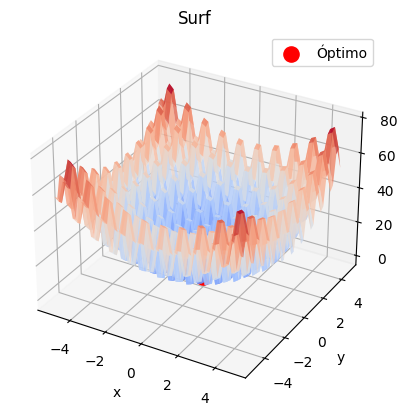

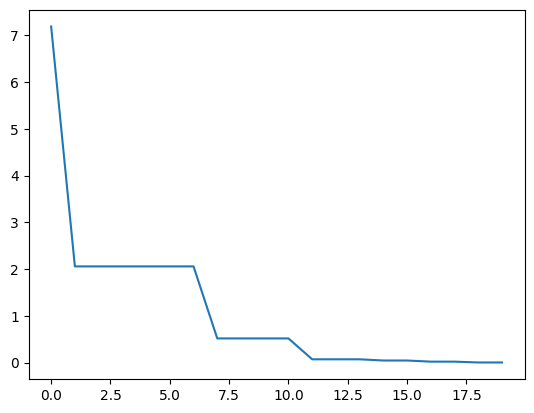

In [9]:
for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    xp[:, i] = x[:, i]
    v[:, i] = 0.5 * np.random.randn(D)
    fitness[i] = f(x[0, i], x[1, i])

for g in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    #plot_contour(f, x, xl, xu)

    for i in range(N):
        fx = f(x[0, i], x[1, i])

        if fx < fitness[i]:
            xp[:, i] = x[:, i]
            fitness[i] = fx

        ig = np.argmin(fitness)

    for i in range(N):
        v[:, i] = w * v[:, i] + c1 * np.random.rand() * (xp[:, i] - x[:, i]) + c2 * np.random.rand() * (xp[:, ig] - x[:, i])
        x[:, i] = x[:, i] + v[:, i]

    f_plot[g] = np.min(fitness)

print("Mínimo global en x=", xp[0, ig], " y=", xp[1, ig], " f(x,y)=", f(xp[0, ig], xp[1, ig]))
plot_surf(f, x, xl, xu, ig)
plt.plot(range(G), f_plot)

# CFPSO

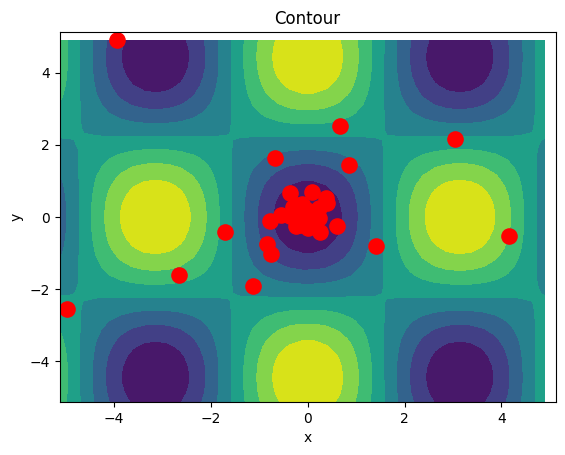

Mínimo global en x= -0.0011865550641332618  y= 0.002329651202364655  f(x,y)= 2.0624825936010893e-06


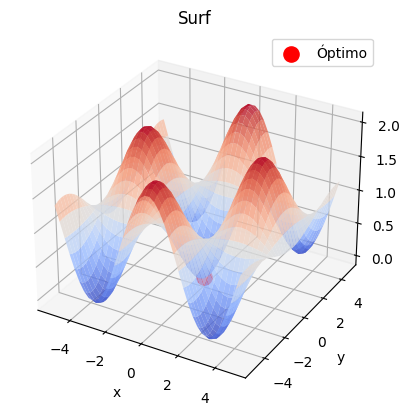

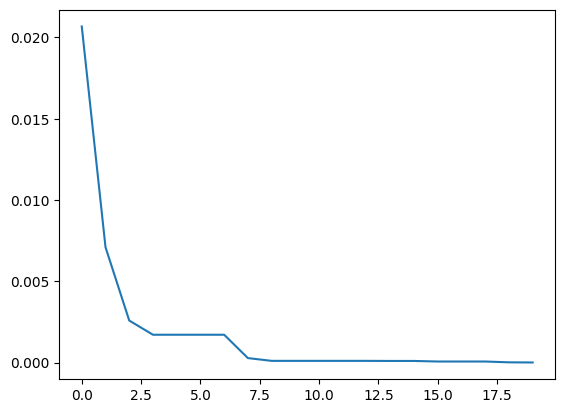

In [12]:
w = 0.6
c1 = 2.1
c2 = 2.05

phi = c1 + c2
K = 2/np.abs(2-phi-np.sqrt(phi**2-4*phi))

for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    xp[:, i] = x[:, i]
    v[:, i] = 0.5 * np.random.randn(D)
    fitness[i] = f(x[0, i], x[1, i])

for g in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plot_contour(f, x, xl, xu)

    for i in range(N):
        fx = f(x[0, i], x[1, i])

        if fx < fitness[i]:
            xp[:, i] = x[:, i]
            fitness[i] = fx

        ig = np.argmin(fitness)

    for i in range(N):
        v[:, i] = K * v[:, i] + c1 * np.random.rand() * (xp[:, i] - x[:, i]) + c2 * np.random.rand() * (xp[:, ig] - x[:, i])
        x[:, i] = x[:, i] + v[:, i]

    f_plot[g] = np.min(fitness)

print("Mínimo global en x=", xp[0, ig], " y=", xp[1, ig], " f(x,y)=", f(xp[0, ig], xp[1, ig]))
plot_surf(f, x, xl, xu, ig)
plt.plot(range(G), f_plot)

# WAPSO

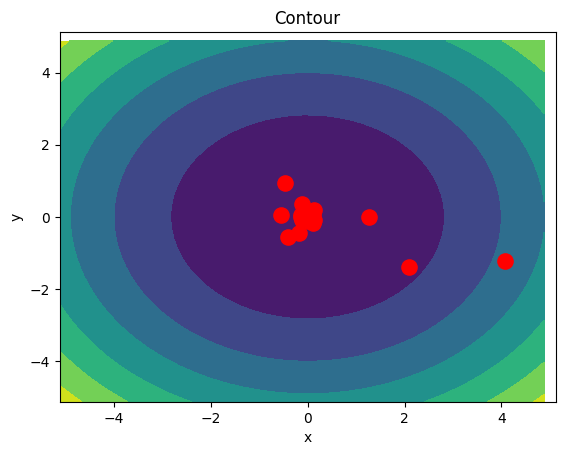

Mínimo global en x= -0.0032296669165118135  y= -0.00102881724973726  f(x,y)= 1.1489213324967865e-05


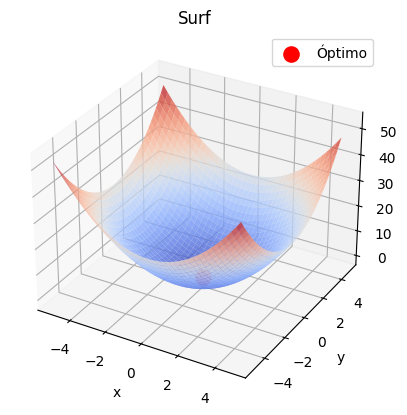

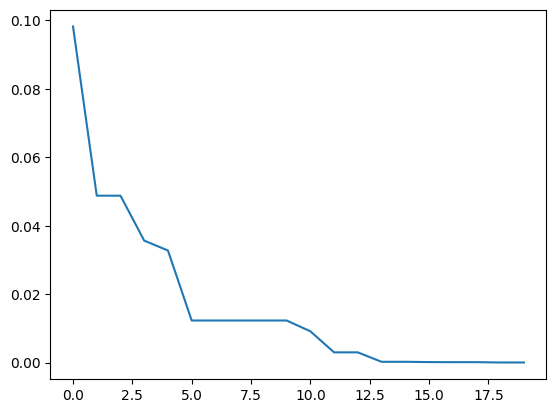

In [15]:
for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    xp[:, i] = x[:, i]
    v[:, i] = 0.5 * np.random.randn(D)
    fitness[i] = f(x[0, i], x[1, i])

for g in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plot_contour(f, x, xl, xu)

    for i in range(N):
        fx = f(x[0, i], x[1, i])

        if fx < fitness[i]:
            xp[:, i] = x[:, i]
            fitness[i] = fx

    ig = np.argmin(fitness)
    w = w_max - (g / G) * (w_max - w_min)


    for i in range(N):
        v[:, i] = w * v[:, i] + c1 * np.random.rand() * (xp[:, i] - x[:, i]) + c2 * np.random.rand() * (xp[:, ig] - x[:, i])
        x[:, i] = x[:, i] + v[:, i]

    f_plot[g] = np.min(fitness)

print("Mínimo global en x=", xp[0, ig], " y=", xp[1, ig], " f(x,y)=", f(xp[0, ig], xp[1, ig]))
plot_surf(f, x, xl, xu, ig)
plt.plot(range(G), f_plot)